In [1]:
# -----------------------------------------------
# Комплексная обработка набора данных о чаевых
# -----------------------------------------------

# 1. Импорт необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns

# 2. Загрузка данных
tips = sns.load_dataset("tips")

# 3. Первичный анализ структуры данных
print("=== Первичный анализ ===")
print(f"Размерность данных: {tips.shape}")  # количество строк и столбцов
print("\nПервые 5 строк данных:")
print(tips.head())  # просмотр первых 5 строк
print("\nИнформация о типах данных:")
print(tips.info())  # типы данных и наличие пропусков

# Определение числовых и категориальных признаков
numeric_cols = tips.select_dtypes(include=["float64", "int64"]).columns.tolist()
categorical_cols = tips.select_dtypes(include=["object", "category"]).columns.tolist()
print(f"\nЧисловые признаки: {numeric_cols}")
print(f"Категориальные признаки: {categorical_cols}")

# 4. Обнаружение пропущенных значений
print("\n=== Пропущенные значения ===")
missing_counts = tips.isnull().sum()
missing_percent = tips.isnull().mean() * 100
print("Количество пропусков по столбцам:")
print(missing_counts)
print("\nПроцент пропусков по столбцам:")
print(missing_percent)

tips_processed = tips.copy()

# Заполняем числовые признаки медианой, категориальные - модой
for col in numeric_cols:
    if tips_processed[col].isnull().any():
        median_value = tips_processed[col].median()
        tips_processed[col] = tips_processed[col].fillna(median_value)
        print(f"Заполнены пропуски в {col} медианой ({median_value})")

for col in categorical_cols:
    if tips_processed[col].isnull().any():
        mode_value = tips_processed[col].mode()[0]
        tips_processed[col] = tips_processed[col].fillna(mode_value)
        print(f"Заполнены пропуски в {col} модой ({mode_value})")

# 5. Преобразование типов данных
# Категориальные признаки преобразуем в тип category
for col in categorical_cols:
    tips_processed[col] = tips_processed[col].astype("category")
    print(f"Столбец '{col}' преобразован в category")

# 6. Создание новых признаков
tips_processed = tips_processed.copy()

# Процент чаевых
tips_processed["tip_percentage"] = np.where(
    tips_processed["total_bill"] > 0,
    tips_processed["tip"] / tips_processed["total_bill"] * 100,
    np.nan,
)

# Категория размера группы
tips_processed["size_category"] = pd.cut(
    tips_processed["size"],
    bins=[0, 2, 4, np.inf],
    labels=["small", "medium", "large"],
    include_lowest=True,
)

# Новый признак: высокие чаевые (>20% от счета)
tips_processed["high_tip"] = (tips_processed["tip_percentage"] > 20).astype(int)

# 7. Сохранение обработанных данных
tips_processed.to_csv("processed_tips.csv", index=False)
print("\nОбработанные данные сохранены в processed_tips.csv")

# 8. Создание текстового отчета по обработке
with open("processing_report.txt", "w", encoding="utf-8") as report:
    report.write("=== Отчет по обработке набора данных 'tips' ===\n\n")
    report.write("1. Первичный анализ:\n")
    report.write(f" - Размерность исходных данных: {tips.shape}\n")
    report.write(f" - Числовые признаки: {numeric_cols}\n")
    report.write(f" - Категориальные признаки: {categorical_cols}\n\n")

    report.write("2. Пропущенные значения:\n")
    for col in tips.columns:
        report.write(
            f" - {col}: {missing_counts[col]} пропусков ({missing_percent[col]:.2f}%)\n"
        )
    report.write("Пропущенные значения обработаны (если бы они были).\n\n")

    report.write("3. Преобразование типов данных:\n")
    for col in categorical_cols:
        report.write(f" - {col} преобразован в category\n")
    report.write("\n")

    report.write("4. Созданные новые признаки:\n")
    report.write(
        " - tip_percentage: процент чаевых от суммы счета (важно для анализа щедрости клиентов)\n"
    )
    report.write(
        " - size_category: категория размера группы (маленькая, средняя, большая)\n"
    )
    report.write(" - high_tip: бинарный признак высоких чаевых (>20%)\n\n")

    report.write("5. Статистика по обработанным данным:\n")
    report.write(f" - Количество строк: {tips_processed.shape[0]}\n")
    report.write(f" - Количество столбцов после обработки: {tips_processed.shape[1]}\n")

    report.write("\n6. Рекомендации по использованию обработанных данных:\n")
    report.write(
        " - Использовать признаки tip_percentage и high_tip для моделей прогнозирования поведения клиентов\n"
    )
    report.write(
        " - size_category полезен для сегментации клиентов по размеру группы\n"
    )
    report.write(
        " - Обработанные данные готовы для использования в задачах ИИ и машинного обучения\n"
    )

=== Первичный анализ ===
Размерность данных: (244, 7)

Первые 5 строк данных:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Информация о типах данных:
<class 'pandas.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None

Числовые признаки: ['total_bil

Всего наблюдений с high_tip: 39
Всего наблюдений в выходные: 163
Всего наблюдений для крупных групп: 46
Объединенное подмножество: 3


total_bill                   tip_percentage                     
                  mean  median       std           mean     median       std
day  time                                                                   
Thur Lunch   17.664754  16.000  7.950334      16.130074  15.384615  3.897208
     Dinner  18.780000  18.780       NaN      15.974441  15.974441       NaN
Fri  Lunch   12.845714  13.420  2.842228      18.876489  18.773467  4.588535
     Dinner  19.663333  18.665  9.471753      15.891611  14.474235  4.702412
Sat  Dinner  20.441379  18.240  9.480419      15.315172  15.183246  5.129259
Sun  Dinner  21.410000  19.630  8.832122      16.689729  16.110332  8.473889

total_bill                    tip_percentage  \
                                mean  median        std           mean   
day  time   sex    smoker                                                
Thur Lunch  Male   Yes     19.171000  17.645   6.757421      16.441676   
                   No      18.486500  16.975   8.739134      16.570635   
            Female Yes     19.218571  16.400  10.847137      16.307257   
                   No      15.899167  13.290   6.904808      15.581426   
     Dinner Female No      18.780000  18.780        NaN      15.974441   
Fri  Lunch  Male   Yes     11.386667  12.160   2.510963      17.414400   
            Female Yes     13.260000  13.420   3.093105      20.372918   
                   No      15.980000  15.980        NaN      18.773467   
     Dinner Male   Yes     25.892000  27.280  10.383290      12.708199   
                   No      17.475000  17.475   7.092281      13.800498   
            Female Yes     12.200000  13.365   4.810121      21.317907   
                   No      22.750000  22.750        NaN      14.285714   
Sat  Dinner Male   Yes     21.837778  20.290   9.988045      13.906681   
                   No      19.929063  17.870   9.779061      16.213217   
            Female Yes     20.266667  22.120  10.485703      16.381673   
                   No      19.003846  17.070   6.730219      14.799347   
Sun  Dinner Male   Yes     26.141333  23.330  10.693824      17.396381   
                   No      20.403256  19.490   8.140559      15.829067   
            Female Yes     16.540000  17.830   4.854764      23.707473   
                   No      20.824286  17.150   8.396159      16.570992   

                                                 
                              median        std  
day  time   sex    smoker                        
Thur Lunch  Male   Yes     15.365988   4.576440  
                   No      16.522346   4.709744  
            Female Yes     15.384615   3.153513  
                   No      14.584848   3.158032  
     Dinner Female No      15.974441        NaN  
Fri  Lunch  Male   Yes     18.092105   5.334460  
            Female Yes     19.821606   5.304402  
                   No      18.773467        NaN  
     Dinner Male   Yes     12.468828   1.785405  
                   No      13.800498   2.491808  
            Female Yes     20.766142   3.851666  
                   No      14.285714        NaN  
Sat  Dinner Male   Yes     14.482259   5.145495  
                   No      15.435249   4.063484  
            Female Yes     15.521855   7.544987  
                   No      14.935506   3.713532  
Sun  Dinner Male   Yes     10.620491  16.293658  
                   No      16.277808   4.149784  
            Female Yes     18.208407  12.024713  
                   No      15.862327   4.600652

day   time  
Sun   Dinner    8.473889
Sat   Dinner    5.129259
Fri   Dinner    4.702412
      Lunch     4.588535
Thur  Lunch     3.897208
      Dinner         NaN
Name: tip_percentage, dtype: float64

mean            count       
time      Lunch     Dinner Lunch Dinner
day                                    
Thur  16.130074  15.974441  61.0    1.0
Fri   18.876489  15.891611   7.0   12.0
Sat         NaN  15.315172   NaN   87.0
Sun         NaN  16.689729   NaN   76.0

mean            count       
time      Lunch     Dinner Lunch Dinner
day                                    
Thur  16.130074  15.974441  61.0    1.0
Fri   18.876489  15.891611   7.0   12.0
Sat         NaN  15.315172   NaN   87.0
Sun         NaN  16.689729   NaN   76.0

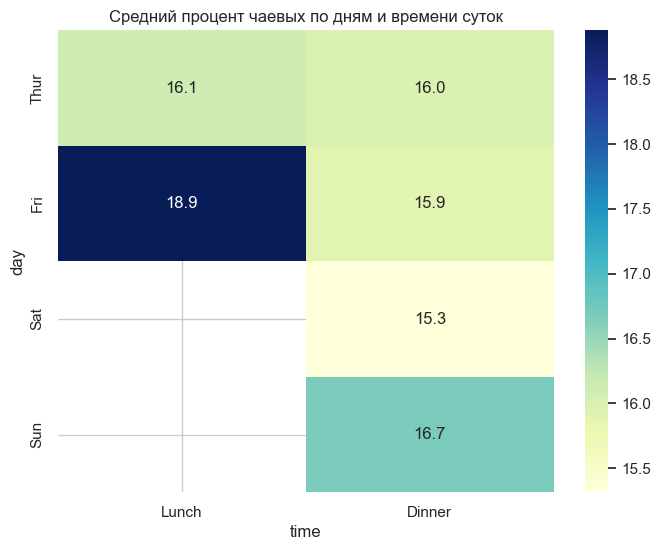

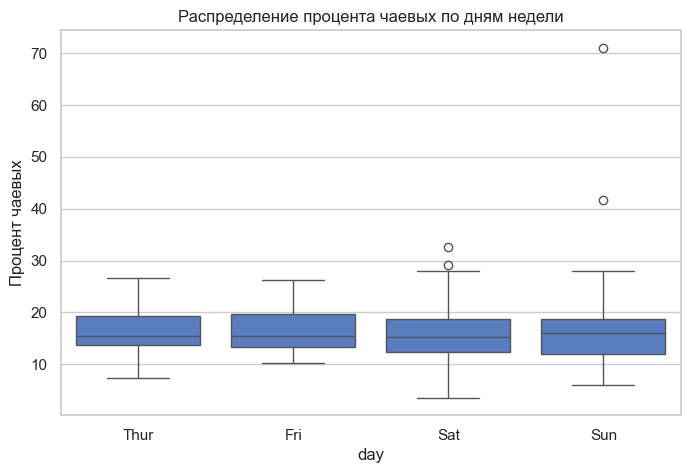

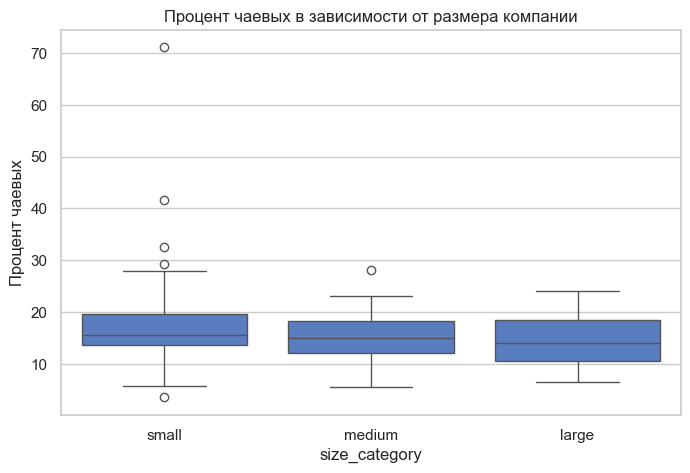

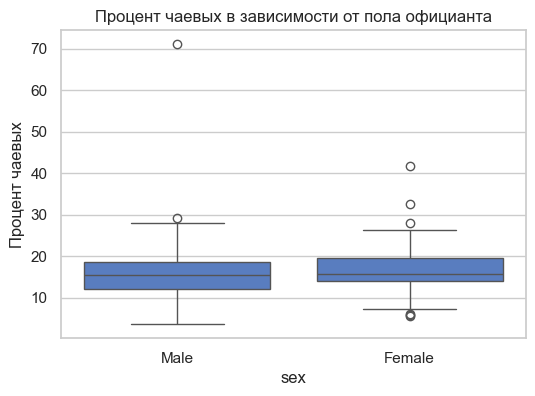

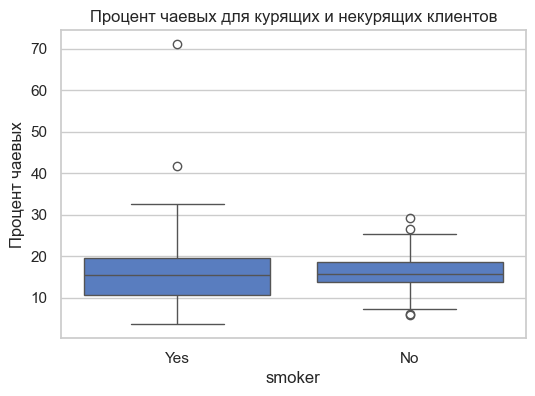

In [4]:
# =====================================================
# Анализ подмножеств данных о чаевых (Jupyter Notebook)
# =====================================================

# 1. Импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Настройки визуализации
sns.set(style="whitegrid", palette="muted")

tips = tips_processed

# =====================================================
# 2. Фильтрация подмножеств данных
# =====================================================

# a) Подмножество с чаевыми > 20%
high_tip = tips[tips["tip_percentage"] > 20]

# b) Подмножество для выходных дней
weekend = tips[tips["day"].isin(["Sat", "Sun"])]

# c) Подмножество для крупных компаний (size >= 4)
large_groups = tips[tips["size"] >= 4]

# d) Объединение условий: крупные компании в выходные с чаевыми > 20%
high_tip_large_weekend = tips[
    (tips["tip_percentage"] > 20)
    & (tips["size"] >= 4)
    & (tips["day"].isin(["Sat", "Sun"]))
]

print(f"Всего наблюдений с high_tip: {len(high_tip)}")
print(f"Всего наблюдений в выходные: {len(weekend)}")
print(f"Всего наблюдений для крупных групп: {len(large_groups)}")
print(f"Объединенное подмножество: {len(high_tip_large_weekend)}")
# =====================================================
# 3. Группировка данных и расчет статистик
# =====================================================

# Группировка по дням и времени суток
grouped = tips.groupby(["day", "time"])

# Расчет статистик: среднее, медиана, стандартное отклонение
stats = grouped[["total_bill", "tip_percentage"]].agg(["mean", "median", "std"])
display(stats)

# Дополнительная группировка с учетом пола официанта и курящего статуса
grouped_extended = tips.groupby(["day", "time", "sex", "smoker"])
stats_extended = grouped_extended[["total_bill", "tip_percentage"]].agg(
    ["mean", "median", "std"]
)
display(stats_extended)

# =====================================================
# 4. Анализ вариации чаевых
# =====================================================

# Стандартное отклонение процента чаевых по дням и времени
tip_std = (
    tips.groupby(["day", "time"])["tip_percentage"].std().sort_values(ascending=False)
)
display(tip_std)

# =====================================================
# 5. Создание сводной таблицы pivot_table
# =====================================================

# Средний процент чаевых по дням и времени
pivot = pd.pivot_table(
    tips,
    values="tip_percentage",
    index="day",
    columns="time",
    aggfunc=["mean", "count"],
)
display(pivot)

# Сводная таблица с третьим измерением - пол официанта
pivot_sex = pd.pivot_table(
    tips,
    values="tip_percentage",
    index=["day", "sex"],
    columns="time",
    aggfunc=["mean", "count"],
)
display(pivot)

# =====================================================
# 6. Визуализация сводной таблицы с heatmap
# =====================================================

plt.figure(figsize=(8, 6))
sns.heatmap(
    pd.pivot_table(
        tips, values="tip_percentage", index="day", columns="time", aggfunc="mean"
    ),
    annot=True,
    fmt=".1f",
    cmap="YlGnBu",
)
plt.title("Средний процент чаевых по дням и времени суток")
plt.show()
# =====================================================
# 7. Распределение чаевых по дням (histogram)
# =====================================================

plt.figure(figsize=(8, 5))
sns.boxplot(x="day", y="tip_percentage", data=tips)
plt.title("Распределение процента чаевых по дням недели")
plt.ylabel("Процент чаевых")
plt.show()
# =====================================================
# 8. Boxplot для сравнения разных групп
# =====================================================

# Влияние размера группы
plt.figure(figsize=(8, 5))
sns.boxplot(x="size_category", y="tip_percentage", data=tips)
plt.title("Процент чаевых в зависимости от размера компании")
plt.ylabel("Процент чаевых")
plt.show()

# Влияние пола официанта
plt.figure(figsize=(6, 4))
sns.boxplot(x="sex", y="tip_percentage", data=tips)
plt.title("Процент чаевых в зависимости от пола официанта")
plt.ylabel("Процент чаевых")
plt.show()

# Влияние курящего статуса
plt.figure(figsize=(6, 4))
sns.boxplot(x="smoker", y="tip_percentage", data=tips)
plt.title("Процент чаевых для курящих и некурящих клиентов")
plt.ylabel("Процент чаевых")
plt.show()

# =====================================================
# 9. Генерация PDF-отчета по анализу чаевых
# =====================================================

# Создание PDF-файла
with PdfPages("tips_analysis_report.pdf") as pdf:
    plt.figure(figsize=(10, 6))
    plt.axis("off")
    pivot_table_str = pivot.to_string()
    plt.text(
        0,
        1,
        "Сводная таблица: Средний процент чаевых и количество наблюдений по дням и времени суток",
        fontsize=12,
        va="top",
    )
    plt.text(0, 0.95, pivot_table_str, fontsize=10, va="top", family="monospace")
    pdf.savefig()
    plt.close()

    plt.figure(figsize=(8, 6))
    sns.heatmap(
        pd.pivot_table(
            tips, values="tip_percentage", index="day", columns="time", aggfunc="mean"
        ),
        annot=True,
        fmt=".1f",
        cmap="YlGnBu",
    )
    plt.title("Heatmap: средний процент чаевых по дням и времени суток")
    pdf.savefig()
    plt.close()

    plt.figure(figsize=(8, 5))
    sns.boxplot(x="day", y="tip_percentage", data=tips)
    plt.title("Распределение процента чаевых по дням недели")
    plt.ylabel("Процент чаевых")
    pdf.savefig()
    plt.close()

    plt.figure(figsize=(8, 5))
    sns.boxplot(x="size_category", y="tip_percentage", data=tips)
    plt.title("Процент чаевых в зависимости от размера компании")
    plt.ylabel("Процент чаевых")
    pdf.savefig()
    plt.close()

    plt.figure(figsize=(6, 4))
    sns.boxplot(x="sex", y="tip_percentage", data=tips)
    plt.title("Процент чаевых в зависимости от пола официанта")
    plt.ylabel("Процент чаевых")
    pdf.savefig()
    plt.close()

    plt.figure(figsize=(6, 4))
    sns.boxplot(x="smoker", y="tip_percentage", data=tips)
    plt.title("Процент чаевых для курящих и некурящих клиентов")
    plt.ylabel("Процент чаевых")
    pdf.savefig()
    plt.close()

    plt.figure(figsize=(8, 6))
    plt.axis("off")
    conclusions = [
        "Выводы по поведению клиентов:",
        "- Наибольшие чаевые оставляются в выходные и в вечернее время",
        "- Крупные компании чаще оставляют более высокие чаевые",
        "- Пол официанта оказывает небольшое влияние на размер чаевых",
        "- Курящие клиенты демонстрируют большую вариацию чаевых",
        "",
        "Практические рекомендации для ресторана:",
        "- Продвигать специальные предложения в выходные дни",
        "- Особое внимание обслуживанию крупных групп",
        "- Оптимизировать распределение персонала по времени и дням",
        "- Использовать данные о чаевых при разработке системы рекомендаций",
    ]

    for i, line in enumerate(conclusions):
        plt.text(0, 1 - i * 0.08, line, fontsize=12, va="top")

    pdf.savefig()
    plt.close()